# Лабораторная работа №1
## Основные понятия математической статистики. Вариационный ряд. Эмпирическая функция распределения.
__Вариант 21.__ $Y=arctg(x)$, $m_x = 2$, $\sigma_x=2\sqrt{3}$, $y_0=5$.

*__Задание 1.__* Сформировать выборку случайных величин $Y_i=\phi(x_i)$, где $X_i$ - равномерно распределенной число из интервала $[a, b]$

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Определим параметры равномерного распределения из начальных данных. Так как $m_x = \frac{a+b}{2}$, a $\sigma_x = \frac{b-a}{2\sqrt{3}}$, тогда чтобы найти $a$ и $b$ нужно решить систему уравнений:
$$\begin{equation}
  \begin{cases}
    b+a = 2m_x,\\
    b-a = 2\sqrt{3}\sigma_x.
  \end{cases}
\end{equation}$$
,$$\begin{equation}
  \begin{cases}
    b+a = 4,\\
    b-a = 12.
  \end{cases}
\end{equation}$$,
откуда следует, что $a=-4$, $b=8$. Тогда:

In [2]:
n = 50 #задается вручную
a = -4.
b = 8.
y0 = 5.

Формируем $n$ равномерно распределенных чисел $\xi_i$ из интервала $[0, 1]$. Следом за этим преобразовываем $\xi_i$ в число $X_i$, имеющее равномерное распределение из требуемого интервала по формуле $X_i = \xi_i(b - a) + a$. Потом по известному правилу $\phi(x)$ последовательно формируем выборку $Y$.

In [3]:
sample_X = []
sample_Y = []
uniform_rv = sts.uniform()
sample_xi = uniform_rv.rvs(size=n)

for i in range(n):
    x = sample_xi[i] * (b - a) + a
    sample_X.append(x)
    y = np.arctan(x)
    sample_Y.append(y)
    

Получили выборку $Y$:

In [4]:
print(sample_Y)

[1.427317816872053, 1.412900303738166, 1.3721723029063115, 0.7430106047688506, -1.0600891584536538, 0.8162016943489678, 1.4070665866501157, -0.00968287532957255, -1.1095768895535927, -1.241697875811319, 1.4451869360664018, 1.4220406477835719, -1.1992873849110277, -0.34869301012105874, 1.3237673130253607, -1.3217092630630627, -0.19950311960376924, -1.2739498981339492, -0.41231514051273077, 1.4120312363792318, -1.2159087033791591, 1.2619222061294404, 1.4448499906658816, 0.40701657840265293, 1.392283346013286, -1.2623406797430439, 1.1449502501379605, 1.3932921030038181, -1.2183189340301335, -0.9879492818812062, 1.1528844978724768, -1.1815614978627171, 1.4403232785431914, 1.4004823534060358, -0.9796979202701175, 0.29153068490215517, -1.2915144288770624, 0.985761938478191, 1.4130049191261551, 1.1663274721712193, -1.1999784967145992, -1.265194528986869, 1.2572698860654856, -1.3002617490210158, -0.7098102649311203, -1.0108355595831948, 1.4029345655316707, 1.4445165509667066, 1.349675557583907

*__Задание 2.__* Для полученной случайной величины построить вариационный ряд, эмпирическую функцию распределения СВ $Y$. Результаты представить в виде таблицы и графика.

In [5]:
ordered_Y = sorted(sample_Y)
d = {"Значение": ordered_Y}
df = pd.DataFrame(data=d)
print("Вариационный ряд:")
df.T

Вариационный ряд:


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Значение,-1.321709,-1.300262,-1.291514,-1.27395,-1.265195,-1.262341,-1.241698,-1.218319,-1.215909,-1.199978,...,1.407067,1.412031,1.4129,1.413005,1.422041,1.427318,1.440323,1.444517,1.44485,1.445187


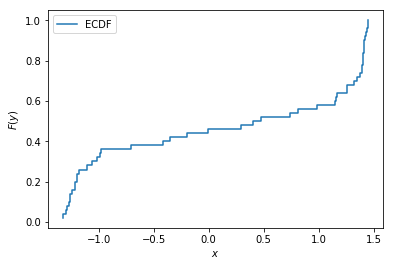

In [6]:
# для построения ECDF (эмпирическая функция распределения) используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample_Y)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

*__Задание 3.__* Найти теоретически функцию распределения СВ $Y$. Результаты представить в аналитическом виде и в виде графика.

Функция распределения случайной величины $Y$ имеет вид:
$$\begin{equation}
  F_y(y)=\begin{cases}
    0, & \text{$y\le\phi(a)$}.\\
    \int_{a}^{\psi(y)} f_x(x) dx, & \text{$\phi(a)<y<\phi(b)$}.\\
    1, & \text{$y\ge\phi(b)$}
  \end{cases}
\end{equation}$$
, где $\psi(x)$ -- обратная функция к $\phi(x)$. Мы имеем $f_x(x) = \frac{1}{b-a} = \frac{1}{12}$, $\psi(y) = tg(y)$. Тогда интеграл будет равен:

$$\int_{a}^{\psi(y)} f_x(x) dx = \frac{1}{12}\int_{a}^{\psi(y)} dx = \frac{1}{12}(\psi(y) - a) = \frac{1}{12}(tg(y) + 4)$$

Тогда теоретическая функция распределения СВ $Y$ запишется:
$$\begin{equation}
  F_y(y)=\begin{cases}
    0, & \text{$y\le arctg(-4)$}.\\
    \frac{1}{12}(tg(y) + 4), & \text{$arctg(-4)<y<arctg(8)$}.\\
    1, & \text{$y\ge arctg(8)$}
  \end{cases}\end{equation}$$

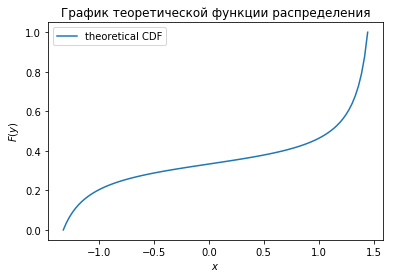

In [7]:
xx = np.linspace(np.arctan(-4), np.arctan(8), 100)
yy = (np.tan(xx) + 4) / 12
plt.title("График теоретической функции распределения")
plt.plot(xx, yy, label='theoretical CDF')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

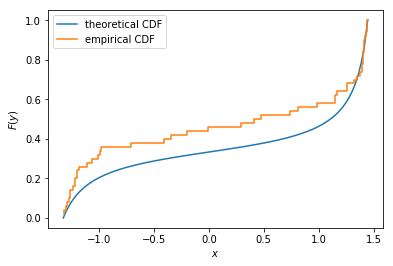

In [8]:
plt.plot(xx, yy, label='theoretical CDF')
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

# Лабораторная работа №2
## Статистический ряд. Построение гистограммы равноинтервальным и равновероятным методами.

*__Задание 1.__* Для полученной случайной величины построить гистограмму равноинтервальным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным. Результаты представить в виде таблицы и графика.

Text(0,0.5,'F(Y)')

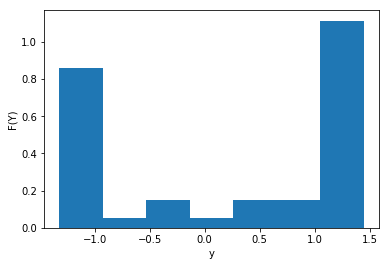

In [13]:
M = int(np.sqrt(n)) if n <= 100 else int(4 * np.log10(n)) # эмпирически определяем количество интервалов
nums, probas, _ = plt.hist(sample_Y, bins=M, density=True) # строим гистограмму равноинтервальным методом
plt.xlabel("y")
plt.ylabel("F(Y)")

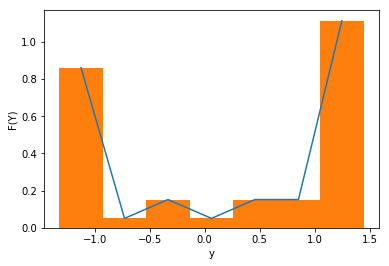

In [14]:
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums) # строим полигон распределения
plt.hist(sample_Y, bins=M, density=True)
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

1.0


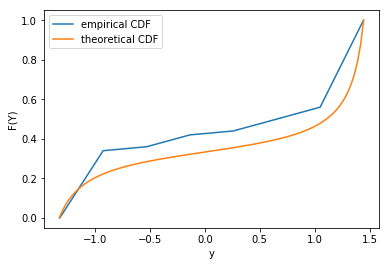

,0,1,2,3,4,5,6,7
Y,-1.321709,-0.926438,-0.531167,-0.135897,0.259374,0.654645,1.049916,1.445187
F(Y),0.000000,0.340000,0.360000,0.420000,0.440000,0.500000,0.560000,1.000000


In [15]:
# построим эмпирическую функцию распределения по сгруппированным данным

normed_nums = nums * (probas[1] - probas[0])
# убедимся, что сумма всех вероятностей равна 1:
print(normed_nums.sum())

ecdf2 = []
sum = 0.
for i in normed_nums:
    ecdf2.append(sum)
    sum += i
ecdf2.append(1)

plt.plot(probas, ecdf2, label='empirical CDF')
plt.plot(xx, yy, label='theoretical CDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

table = pd.DataFrame(data={"Y": probas, "F(Y)": ecdf2})
table.T

*__Задание 2.__* Найти теоретически плотность распределения СВ Y.  Результаты представить в аналитическом виде и в виде графика.

Так как нам известна функция распределения СВ $F(y)$, мы можем найти плотность распределения просто продифференцировав функцию распределения: $F(y)' = f(y)$. Тогда $$f(y)=(\frac{1}{12}(tg(y) + 4))' = \frac{1}{12 \cos^2(y)}, arctg(-4)<y<arctg(8)$$.
Изобразим график теоретической плотности:

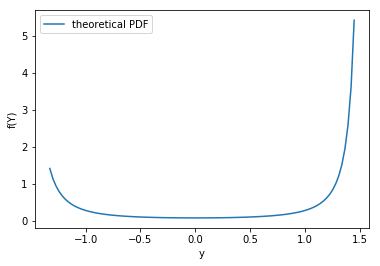

In [16]:
py = 1./(12. * np.cos(xx)**2)
plt.plot(xx, py, label='theoretical PDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

*__Задание 3.__* Сравнить полученные результаты, представив графики теоретической и эмпирической плотностей распределения в одном окне.  

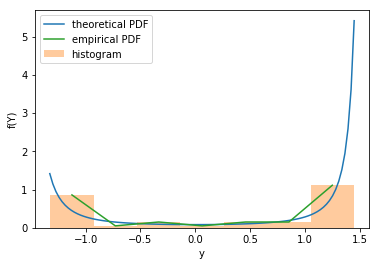

In [17]:
plt.plot(xx, py, label='theoretical PDF')
plt.hist(sample_Y, bins=M, density=True, label="histogram", alpha=0.4)
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums, label='empirical PDF')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

*__Задание 4.__* Для полученной случайной величины построить гистограмму равновероятностным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным. Результаты представить в виде таблицы и графика.

In [18]:
m = n // M

def hist_eq_prob(sample):
    sample.sort()
    A = [sample[0]]
    B = []
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    B.append(sample[-1])
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (x, y)

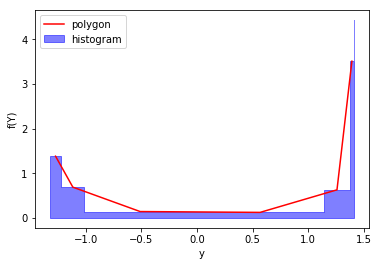

,0,1,2,3,4,5,6
x0,-1.321709,-1.218319,-1.010836,-0.009683,1.144950,1.372172,1.412900
normed m,1.381726,0.688523,0.142693,0.123725,0.628712,3.507590,4.424653


In [19]:
x, y = hist_eq_prob(sample_Y)
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
nx = []
for i in range(len(x) - 1):
    nx.append((x[i] + x[i+1]) / 2)
plt.plot(nx, y[:-1], color='r', label='polygon')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

table2 = pd.DataFrame(data={"x0" : x, "normed m": y})
table2.T

In [81]:
# построим эмпирическую функцию распределения по сгруппированным данным

ecdf3 = []
sum = 0.
for i in range(len(y)):
    ecdf3.append(sum)
    sum += 1 / M

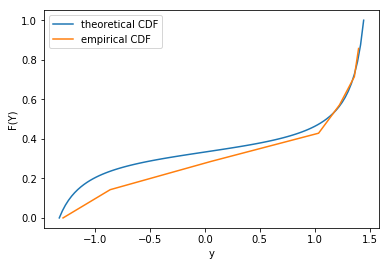

In [82]:
plt.plot(xx, yy, label='theoretical CDF')
plt.plot(x, ecdf3, label='empirical CDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

*__Задание 5.__* Сравнить полученные результаты, представив графики теоретической и эмпирической плотностей распределения в одном окне.  

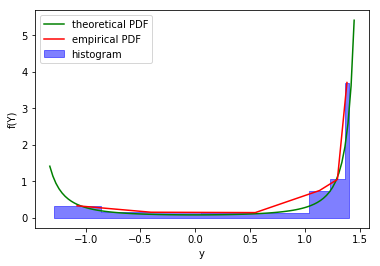

In [83]:
plt.plot(xx, py, label='theoretical PDF', c='g')
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
plt.plot(nx, y[:-1], color='r', label='empirical PDF')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()